In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config_key import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
from pprint import pprint

city = "Paris"
response = requests.get(query_url + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.8534, 'lon': 2.3488},
 'dt': 1703223352,
 'id': 2988507,
 'main': {'feels_like': 9.51,
          'humidity': 91,
          'pressure': 1015,
          'temp': 10.07,
          'temp_max': 10.43,
          'temp_min': 9.65},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6550,
         'sunrise': 1703230899,
         'sunset': 1703260574,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 7.72}}


In [4]:
response['coord']['lat']

48.8534

In [5]:
response['main']['temp']

10.07

In [6]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing","Houston"]

# set up lists to hold response info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 29.7633]
The temperature information received is: [10.07, 10.44, -1.74, -4.06, 15.95]


In [7]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,10.07
1,London,51.5085,10.44
2,Oslo,59.9127,-1.74
3,Beijing,39.9075,-4.06
4,Houston,29.7633,15.95


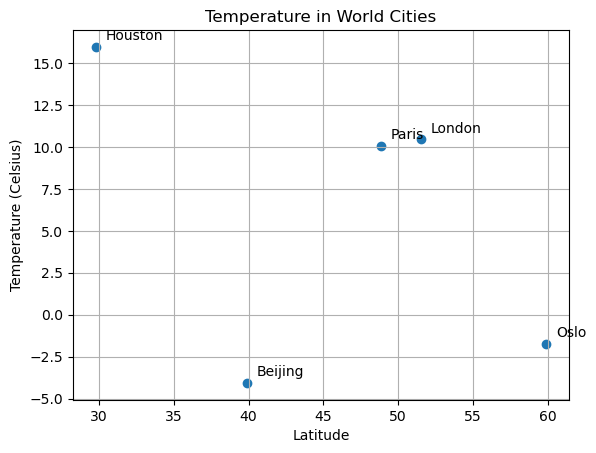

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Annotate each point with the corresponding city
for i, txt in enumerate(weather_data["city"]):
    plt.annotate(txt, (weather_data["lat"][i], weather_data["temp"][i]),xytext=(7,5), textcoords='offset points')

# Show plot
plt.show()